# 라이브러리 불러오기

## 필요한 라이브러리들을 불러오기

In [1]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as ms
import numpy as np
import pandas_profiling
import folium

## 한글화 작업과 음수표기

In [2]:
#plt.rc("font", family="Malgun Gothic")
#plt.rc("axes", unicode_minus=False)

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

## 한글을 선명하게

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 데이터 불러오기

In [4]:
df = pd.read_csv("csv\Food_Truck.csv", encoding="cp949")

## pandas_profiling 사용

### http://localhost:8888/view/Downloads/%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/Food_Truck.html

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
import matplotlib
matplotlib.font_manager._rebuild()

from matplotlib import font_manager
for i in font_manager.fontManager.ttflist:
    if 'Malgun' in i.name:
        print(i.name, i.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgunbd.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Malgun Gothic C:\Windows\Fonts\malgun.ttf


In [7]:
from pandas_profiling import ProfileReport

from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False 

%time profile = ProfileReport(df, title="전국 푸드트럭 데이터")
profile.to_file(output_file="Food_Truck.html")

Wall time: 9.97 ms


## 데이터 미리보기

In [8]:
df.head(1)

,허가구역명,장소유형,시도명,시군구명,소재지도로명주소,소재지지번주소,위도,경도,푸드트럭운영대수,허가구역사용료,...,11월운영시작시각,11월운영종료시각,12월운영시작시각,12월운영종료시각,판매제한품목,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명
0,완산쳬련공원,3,13,전주시 완산구,전라북도 전주시 완산구 모악산자락길 22(중인동),전라북도 전주시 완산구 중인동 361-1,35.767445,127.101549,1.0,"월 55,000원",...,NaN,NaN,NaN,NaN,NaN,전라북도 전주시시설관리공단 공원운영부,063-239-2568,2019-08-30,4640000,전라북도 전주시


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   허가구역명         298 non-null    object 
 1   장소유형          298 non-null    int64  
 2   시도명           298 non-null    object 
 3   시군구명          298 non-null    object 
 4   소재지도로명주소      184 non-null    object 
 5   소재지지번주소       260 non-null    object 
 6   위도            257 non-null    float64
 7   경도            254 non-null    float64
 8   푸드트럭운영대수      246 non-null    float64
 9   허가구역사용료       298 non-null    object 
 10  허가구역운영시작일자    298 non-null    object 
 11  허가구역운영종료일자    298 non-null    object 
 12  허가구역휴무일       298 non-null    object 
 13  허가구역평일운영시작시각  298 non-null    object 
 14  허가구역평일운영종료시각  298 non-null    object 
 15  허가구역주말운영시작시각  298 non-null    object 
 16  허가구역주말운영종료시각  298 non-null    object 
 17  1월운영시작시각      106 non-null    object 
 18  1월운영종료시각      104 non-null    

In [10]:
df.describe()

,장소유형,위도,경도,푸드트럭운영대수
count,298.000000,257.000000,254.000000,246.000000
mean,28.382550,36.227448,127.590957,1.723577
std,41.073572,1.297304,0.853240,2.483581
min,1.000000,33.244985,126.230297,0.000000
25%,3.000000,35.224314,126.902756,1.000000
50%,6.000000,36.395725,127.315767,1.000000
75%,76.250000,37.357642,128.416439,1.000000
max,99.000000,38.481383,129.410696,18.000000


## 결측치 살펴보기

In [11]:
df.isnull().mean() * 100

허가구역명            0.000000
장소유형             0.000000
시도명              0.000000
시군구명             0.000000
소재지도로명주소        38.255034
소재지지번주소         12.751678
위도              13.758389
경도              14.765101
푸드트럭운영대수        17.449664
허가구역사용료          0.000000
허가구역운영시작일자       0.000000
허가구역운영종료일자       0.000000
허가구역휴무일          0.000000
허가구역평일운영시작시각     0.000000
허가구역평일운영종료시각     0.000000
허가구역주말운영시작시각     0.000000
허가구역주말운영종료시각     0.000000
1월운영시작시각        64.429530
1월운영종료시각        65.100671
2월운영시작시각        64.765101
2월운영종료시각        65.100671
3월운영시작시각        64.429530
3월운영종료시각        64.765101
4월운영시작시각        64.429530
4월운영종료시각        64.765101
5월운영시작시각        64.093960
5월운영종료시각        64.429530
6월운영시작시각        64.429530
6월운영종료시각        64.765101
7월운영시작시각        64.765101
7월운영종료시각        65.100671
8월운영시작시각        64.093960
8월운영종료시각        64.429530
9월운영시작시각        64.093960
9월운영종료시각        64.429530
10월운영시작시각       64.093960
10월운영종료시각       64.429530
11월운영시작시각       64.093960
11월운영종료시각   

<AxesSubplot:>

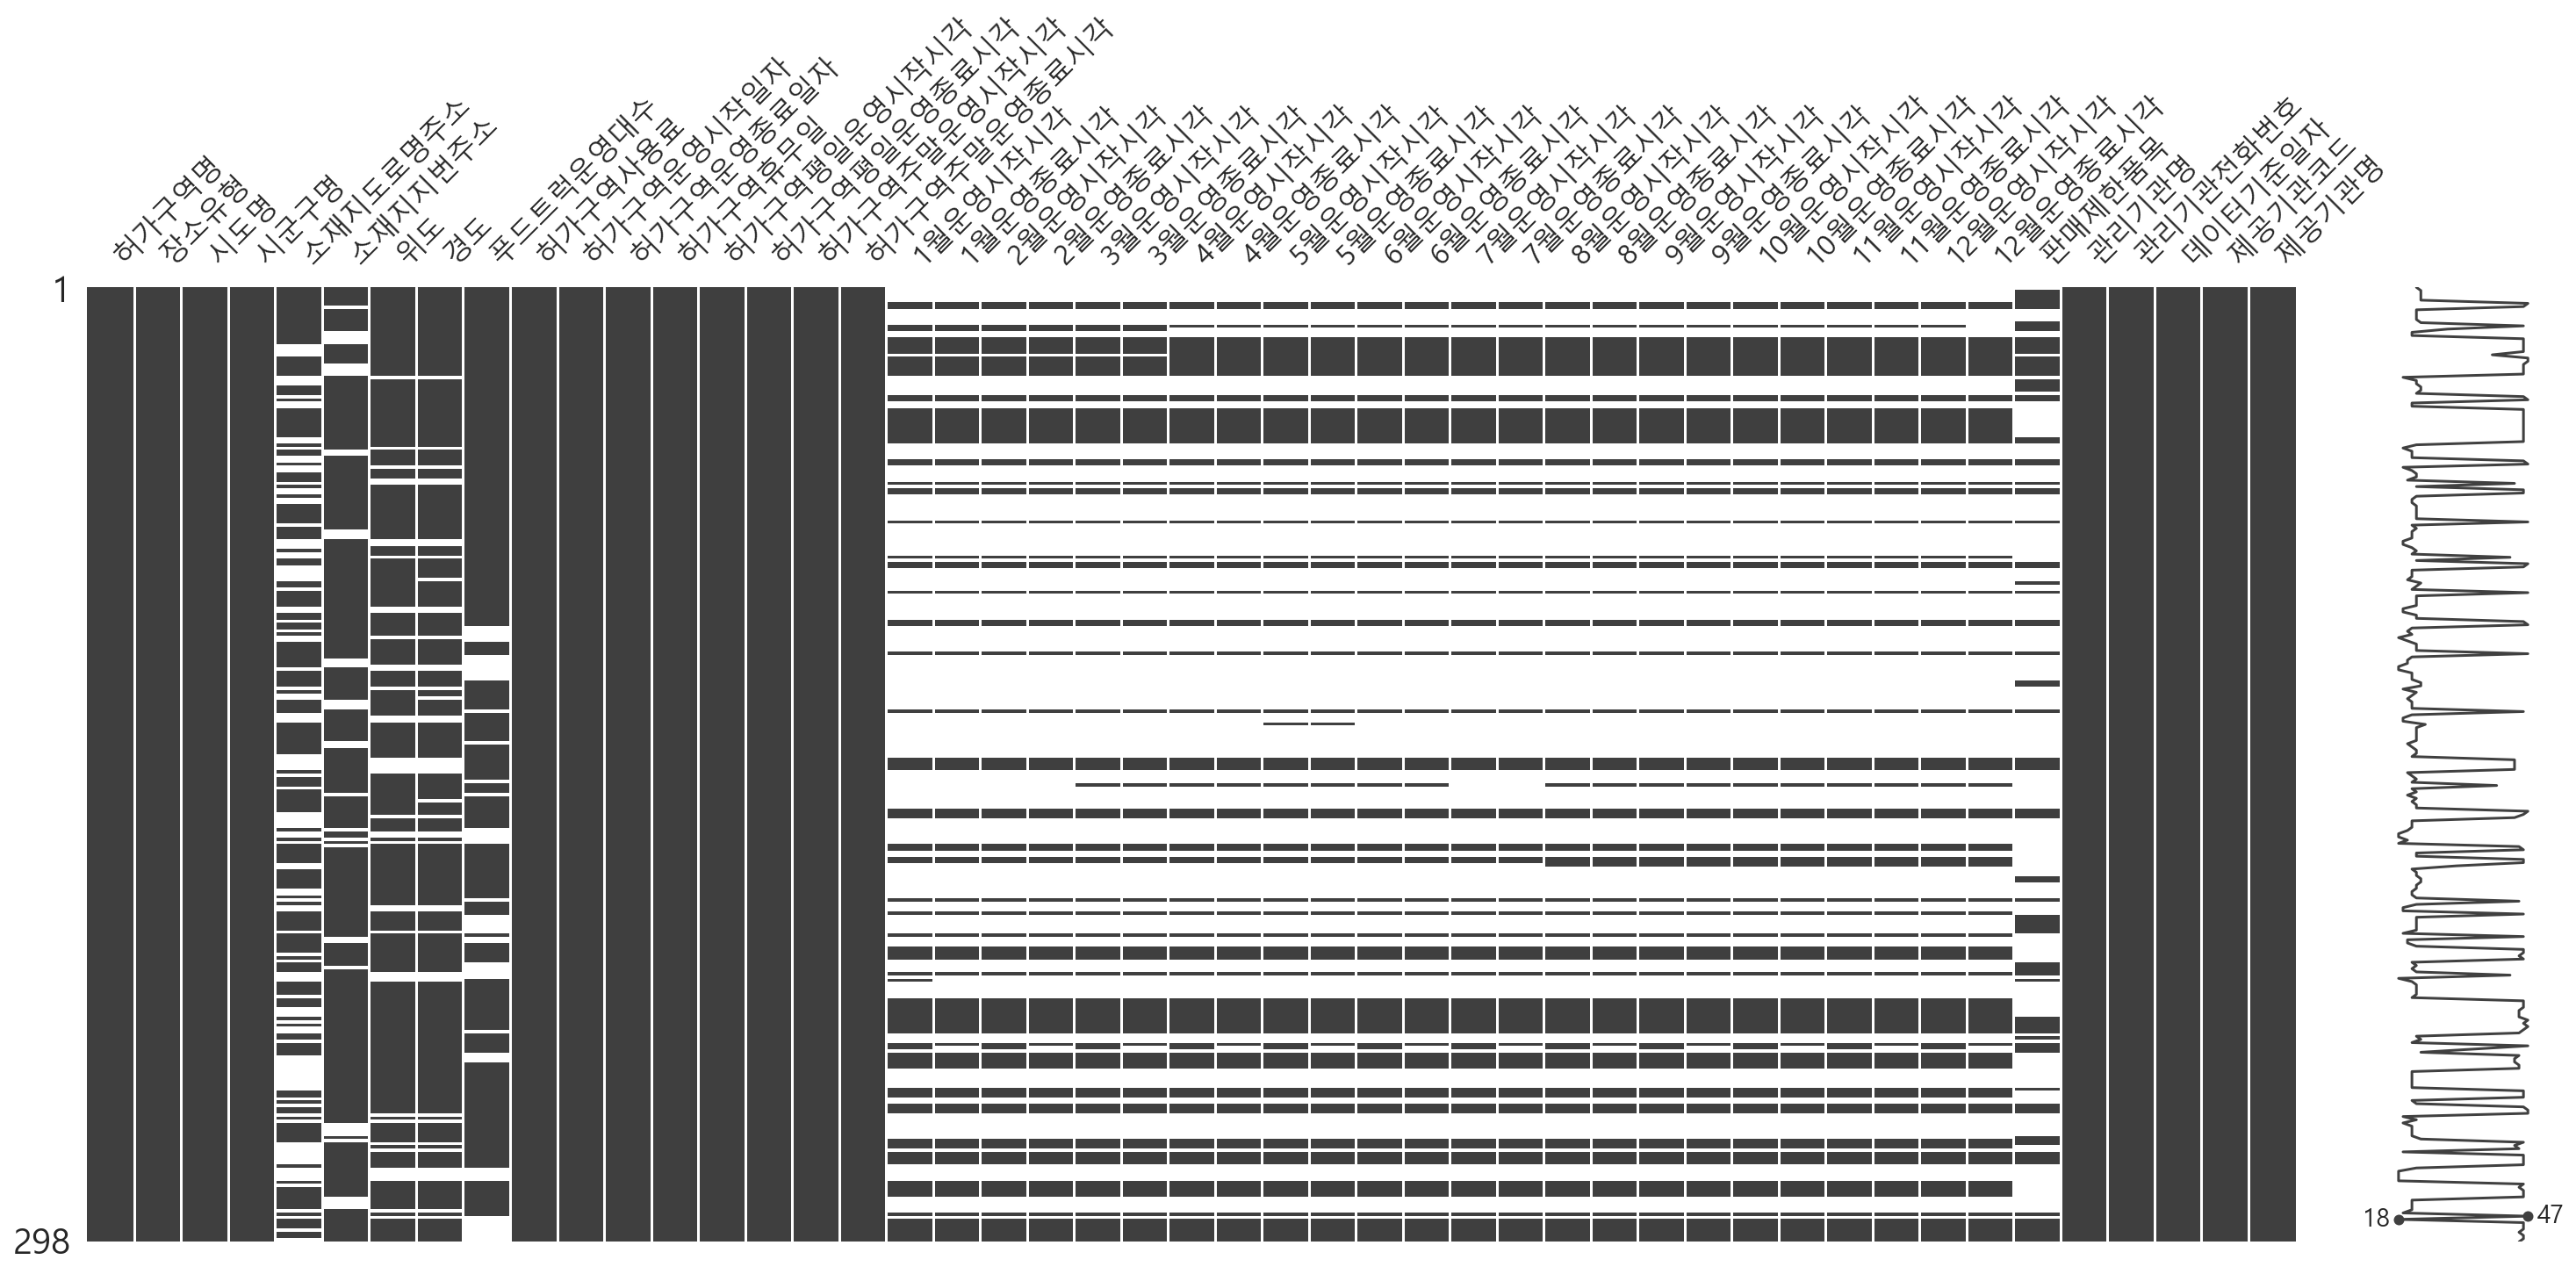

In [12]:
ms.matrix(df)
#결측치 확인

# 데이터 전처리

## 필요한 columns 만 사용

In [13]:
col = ["허가구역명", "장소유형", "시도명", "시군구명", "소재지도로명주소", "소재지지번주소", "위도", "경도",
       "허가구역운영시작일자", "허가구역휴무일", "허가구역평일운영시작시각", 
      "허가구역평일운영종료시각", "허가구역주말운영시작시각", "허가구역주말운영종료시각", "데이터기준일자"]
col

['허가구역명',
 '장소유형',
 '시도명',
 '시군구명',
 '소재지도로명주소',
 '소재지지번주소',
 '위도',
 '경도',
 '허가구역운영시작일자',
 '허가구역휴무일',
 '허가구역평일운영시작시각',
 '허가구역평일운영종료시각',
 '허가구역주말운영시작시각',
 '허가구역주말운영종료시각',
 '데이터기준일자']

In [14]:
print(df.shape)
df = df[col].copy()
df.shape
#필요없는 columns 제거

(298, 47)


(298, 15)

In [15]:
df.sample(1)

,허가구역명,장소유형,시도명,시군구명,소재지도로명주소,소재지지번주소,위도,경도,허가구역운영시작일자,허가구역휴무일,허가구역평일운영시작시각,허가구역평일운영종료시각,허가구역주말운영시작시각,허가구역주말운영종료시각,데이터기준일자
87,평사리공원,4,경상남도,하동군,NaN,경상남도 하동군 악양면 평사리 72-2,35.13539,127.691257,2018-07-01,월요일,09:00,18:00,09:00,18:00,2020-12-28


## 시도명 통일 작업

In [16]:
df["시도명"].value_counts()

경기도        58
경상남도       42
충청남도       24
강원도        22
제주특별자치도    17
충청북도       16
전라남도       16
광주광역시      16
경상북도       15
서울특별시      13
인천광역시      12
대구광역시      11
15          8
부산광역시       8
10          5
전라북도        5
대전광역시       4
09          2
02          2
13          1
6           1
Name: 시도명, dtype: int64

In [17]:
df[df["시도명"] == "13"]
#경상북도 = 15
#강원도 = 10
#경기도 = 09
#부산광역시 = 02
#대전광역시 = 6
#전라북도 = 13

,허가구역명,장소유형,시도명,시군구명,소재지도로명주소,소재지지번주소,위도,경도,허가구역운영시작일자,허가구역휴무일,허가구역평일운영시작시각,허가구역평일운영종료시각,허가구역주말운영시작시각,허가구역주말운영종료시각,데이터기준일자
0,완산쳬련공원,3,13,전주시 완산구,전라북도 전주시 완산구 모악산자락길 22(중인동),전라북도 전주시 완산구 중인동 361-1,35.767445,127.101549,2018-10-15,연중무휴,10:00,18:00,08:00,18:00,2019-08-30


In [18]:
df["시도명"].value_counts()

경기도        58
경상남도       42
충청남도       24
강원도        22
제주특별자치도    17
충청북도       16
전라남도       16
광주광역시      16
경상북도       15
서울특별시      13
인천광역시      12
대구광역시      11
15          8
부산광역시       8
10          5
전라북도        5
대전광역시       4
09          2
02          2
13          1
6           1
Name: 시도명, dtype: int64

In [19]:
df.loc[df["시도명"].str.contains("15"), "시도명"] = "경상북도"
df.loc[df["시도명"].str.contains("10"), "시도명"] = "강원도"
df.loc[df["시도명"].str.contains("09"), "시도명"] = "경기도"
df.loc[df["시도명"].str.contains("02"), "시도명"] = "부산광역시"
df.loc[df["시도명"].str.contains("6"), "시도명"] = "대전광역시"
df.loc[df["시도명"].str.contains("13"), "시도명"] = "전라북도"

#df["시도명"] 통일

In [20]:
df["시도명"].value_counts()

경기도        60
경상남도       42
강원도        27
충청남도       24
경상북도       23
제주특별자치도    17
광주광역시      16
충청북도       16
전라남도       16
서울특별시      13
인천광역시      12
대구광역시      11
부산광역시      10
전라북도        6
대전광역시       5
Name: 시도명, dtype: int64

In [21]:
df.isnull().sum()

허가구역명             0
장소유형              0
시도명               0
시군구명              0
소재지도로명주소        114
소재지지번주소          38
위도               41
경도               44
허가구역운영시작일자        0
허가구역휴무일           0
허가구역평일운영시작시각      0
허가구역평일운영종료시각      0
허가구역주말운영시작시각      0
허가구역주말운영종료시각      0
데이터기준일자           0
dtype: int64

## 주소 통일

In [22]:
df[["소재지도로명주소", "소재지지번주소"]]

,소재지도로명주소,소재지지번주소
0,전라북도 전주시 완산구 모악산자락길 22(중인동),전라북도 전주시 완산구 중인동 361-1
1,경기도 남양주시 다산지금로 91,경기도 남양주시 이패동 산87
2,경기도 남양주시 진건읍 진건오남로 41-25,경기도 남양주시 진건읍 사능리 646-7
3,경기도 남양주시 별내3로 244(별내동),경기도 남양주시 별내동 910
4,경기도 남양주시 다산중앙로 7(다산동),경기도 남양주시 다산동 6150
...,...,...
293,강원도 평창군 봉평면 태기로 174,강원도 평창군 봉평면 면온리 1095-1
294,NaN,강원도 평창군 미탄면 마하리
295,강원도 평창군 평창읍 평창시장1길 8-1,강원도 평창군 평창읍 하리 55-6
296,강원도 평창군 대화면 대화3길 41,강원도 평창군 대화리 1001-171


In [23]:
df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])
#df["소재지도로명주소"]의 널값을 지번주소로 채워줍니다.

In [24]:
df["소재지도로명주소"].isnull().sum()

0

In [25]:
df = df.drop("소재지지번주소", axis=1).copy()

In [26]:
df["소재지도로명주소"].isnull().sum()

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   허가구역명         298 non-null    object 
 1   장소유형          298 non-null    int64  
 2   시도명           298 non-null    object 
 3   시군구명          298 non-null    object 
 4   소재지도로명주소      298 non-null    object 
 5   위도            257 non-null    float64
 6   경도            254 non-null    float64
 7   허가구역운영시작일자    298 non-null    object 
 8   허가구역휴무일       298 non-null    object 
 9   허가구역평일운영시작시각  298 non-null    object 
 10  허가구역평일운영종료시각  298 non-null    object 
 11  허가구역주말운영시작시각  298 non-null    object 
 12  허가구역주말운영종료시각  298 non-null    object 
 13  데이터기준일자       298 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 32.7+ KB


## 위도 경도 결측치 대체

In [28]:
df[(df["위도"].isnull()) | (df["경도"].isnull())]

,허가구역명,장소유형,시도명,시군구명,소재지도로명주소,위도,경도,허가구역운영시작일자,허가구역휴무일,허가구역평일운영시작시각,허가구역평일운영종료시각,허가구역주말운영시작시각,허가구역주말운영종료시각,데이터기준일자
28,병지방계곡,2,강원도,횡성군,강원도 횡성군 갑천면 병지방리 530,NaN,NaN,2017-03-15,연중무휴,00:00,23:59,00:00,23:59,2020-10-13
50,청계산 공영주차장,99,경기도,의왕시,경기도 의왕시 청계동 77번지 청계산 공영주차장,NaN,NaN,2017-09-27,월요일+화요일+수요일+목요일+금요일,00:00,00:00,10:00,19:00,2020-11-19
56,독봉산웰빙공원,4,경상남도,거제시,경상남도 거제시 상동동 1005-17,NaN,NaN,2016-12-12,사정에 따라 다름,00:00,23:59,00:00,23:59,2020-07-31
60,함평공영주차장 내(현재 미운영),2,전라남도,함평군,전라남도 함평군 함평읍 기각리 994-12,NaN,NaN,2016-12-16,미운영,00:00,00:00,00:00,00:00,2020-09-22
61,경인아라뱃길 시천교,5,인천광역시,서구,인천광역시 서구 시천동 158-11,NaN,NaN,2019-01-04,연중무휴,10:00,22:00,10:00,22:00,2021-07-02
79,사천대교왕씨앗호떡,4,경상남도,사천시,경상남도 사천시 서포면 자혜리 산 23-20,NaN,NaN,2017-06-05,공휴일,09:00,20:00,09:00,20:00,2021-01-14
80,누누토스트,7,경상남도,사천시,경상남도 사천시 곤양면 맥사리 165-7,NaN,NaN,2020-01-06,공휴일,09:00,20:00,09:00,20:00,2021-01-14
84,고속도로 졸음쉼터,7,경기도,수정구,경기도 성남시 수정구 수진동 산39-13,NaN,NaN,2020-10-19,연중무휴,08:00,19:00,08:00,19:00,2021-01-01
91,구)탐라대교차로,99,제주특별자치도,서귀포시,제주특별자치도 서귀포시 하원동 산 76-1,33.291054,NaN,2021-06-07,연중무휴,00:00,23:59,00:00,23:59,2021-06-30
100,왕송호수공원,4,경기도,의왕시,경기도 의왕시 초평동 278번지 9호 왕송호수공원 내,NaN,NaN,2016-12-20,월요일+화요일+수요일+목요일+금요일,00:00,00:00,10:00,19:00,2020-11-19


In [29]:
'''
강원도 횡성군 갑천면 병지방리 530 : 37.597969792582354, 128.05755992807926
경기도 의왕시 청계동 77번지 청계산 공영주차장 : 37.40649573850446, 127.02539352394432
경상남도 거제시 상동동 1005-17 : 34.87753922099388, 128.63434524138506
전라남도 함평군 함평읍 기각리 994-12 : 35.06273234388576, 126.5232127972144
인천광역시 서구 시천동 158-11 : 37.570552065358335, 126.68049761263931
경상남도 사천시 서포면 자혜리 산 23-20 : 35.00470442058188, 128.01880809721263
경상남도 사천시 곤양면 맥사리 165-7 : 35.05322265157976, 127.94470126163183
경기도 성남시 수정구 수진동 산39-13 : 37.436136270195675, 127.12349856171113
제주특별자치도 서귀포시 하원동 산 76-1 : 33.291092780819874, 126.46088322599375
경기도 의왕시 초평동 278번지 9호 왕송호수공원 내 : 37.31001564723856, 126.95073603961842
경기도 의왕시 초평동 278번지 9호 왕송호수공원 내 : 37.31001564723856, 126.95073603961842
충청남도 예산군 응봉면 후사리 448-1 : 36.63773151645251, 126.79920792425433
대전광역시 대덕구 상서동 산 66-11 : 36.42547193335059, 127.41669758376526
충청남도 예산군 예산읍 산성리 435-2 : 36.68529107439904, 126.8222850665853
강원도 원주시 소초면 평장리 산 125-8 : 37.42026664656488, 128.00142587030484
경상남도 양산시 동면 가산리 759 : 35.294379689437115, 129.0191255395513
강원도 춘천시 남산면 강촌리 산 1	: 37.821426779640035, 127.6638418684713
강원도 춘천시 남면 가정리 908 : 37.733858600181975, 127.57423856846829
경상북도 영덕군 축산면 축산리 944-7 : 36.50626928506874, 129.44661662393685
경상북도 영덕군 축산면 축산리 944-7 : 36.50626928506874, 129.44661662393685
경상북도 영덕군 영덕읍 창포리 113-1 : 36.417652568069336, 129.4307205932532
경상북도 영덕군 영덕읍 창포리 328-1 : 36.42496514244627, 129.4192511279419
경기도 가평군 가평읍 자라섬로 60	 : 37.82115945541507, 127.52090731264802
경기도 화성시 남양읍 남양리 2060번지 푸드트럭 : 37.21190863634148, 126.82370782427378
광주광역시 광산구 선암동 214-4 : 35.144742304964915, 126.77922002420519
대구광역시 북구 검단동 543-2 : 35.9153499822414, 128.61597245121834
대구광역시 북구 검단동 376-11 : 35.91598229383221, 128.6152844768351
대구광역시 북구 산격동 677-3 : 35.90558160373318, 128.60089152423004
경상북도 구미시 도량동 472-4 : 36.13646954037568, 128.31618239724975
경상북도 구미시 도량동 333-2 : 36.136674687576296, 128.31802133957893
광주광역시 서구 풍암동 491-3 : 35.12648580473893, 126.86903169906387
광주광역시 광산구 선암동 214-4 : 35.14468966710472, 126.77926293954651
인천광역시 계양구 평동 23-12 : 37.58280851919348, 126.77295543962782
서울특별시 서대문구 현저동 107-399 : 37.57080053511412, 126.95384448565136
충청북도 청주시 상당구 월오동 113-1 : 36.627087885611296, 127.54708271260732
충청북도 청주시 상당구 가덕면 병암리 95-5 : 36.57764535896732, 127.57704619911158
충청북도 충주시 중앙탑면 하구암리 352-3 : 37.041546227468075, 127.83152979728003
부산광역시 동구 초량동 827-389 친환경스카이웨이주차장 : 35.12092439357231, 129.03191311255767
인천광역시 계양구 평동 23-12 : 37.58287653763684, 126.77297689729849
인천광역시 계양구 평동 23-12 : 37.58287653763684, 126.77297689729849
인천광역시 계양구 귤현동 396 : 37.572865438497864, 126.74167460894486
인천광역시 계양구 평동 23-12 : 37.58287653763684, 126.77297689729849
충청북도 청주시 흥덕구 오송읍 오송리 15-4 : 36.61825501515644, 127.32956361260709
경기도 포천시 군내면 하성북리 637-5 : 37.89268794857692, 127.2101997568271
'''

#결측치들의 "위도", "경도" 값을 조사

'\n강원도 횡성군 갑천면 병지방리 530 : 37.597969792582354, 128.05755992807926\n경기도 의왕시 청계동 77번지 청계산 공영주차장 : 37.40649573850446, 127.02539352394432\n경상남도 거제시 상동동 1005-17 : 34.87753922099388, 128.63434524138506\n전라남도 함평군 함평읍 기각리 994-12 : 35.06273234388576, 126.5232127972144\n인천광역시 서구 시천동 158-11 : 37.570552065358335, 126.68049761263931\n경상남도 사천시 서포면 자혜리 산 23-20 : 35.00470442058188, 128.01880809721263\n경상남도 사천시 곤양면 맥사리 165-7 : 35.05322265157976, 127.94470126163183\n경기도 성남시 수정구 수진동 산39-13 : 37.436136270195675, 127.12349856171113\n제주특별자치도 서귀포시 하원동 산 76-1 : 33.291092780819874, 126.46088322599375\n경기도 의왕시 초평동 278번지 9호 왕송호수공원 내 : 37.31001564723856, 126.95073603961842\n경기도 의왕시 초평동 278번지 9호 왕송호수공원 내 : 37.31001564723856, 126.95073603961842\n충청남도 예산군 응봉면 후사리 448-1 : 36.63773151645251, 126.79920792425433\n대전광역시 대덕구 상서동 산 66-11 : 36.42547193335059, 127.41669758376526\n충청남도 예산군 예산읍 산성리 435-2 : 36.68529107439904, 126.8222850665853\n강원도 원주시 소초면 평장리 산 125-8 : 37.42026664656488, 128.00142587030484\n경상남도 양산시 동면 가산리 759 

In [30]:
lat_long_list = [37.597969792582354, 128.05755992807926, 37.40649573850446, 127.02539352394432, 
                 34.87753922099388, 128.63434524138506, 35.06273234388576, 126.5232127972144, 
                37.570552065358335, 126.68049761263931, 35.00470442058188, 128.01880809721263, 
                35.05322265157976, 127.94470126163183, 37.436136270195675, 127.12349856171113, 
                33.291092780819874, 126.46088322599375, 37.31001564723856, 126.95073603961842, 
                37.31001564723856, 126.95073603961842, 36.63773151645251, 126.79920792425433, 
                36.42547193335059, 127.41669758376526, 36.68529107439904, 126.8222850665853, 
                37.42026664656488, 128.00142587030484, 35.294379689437115, 129.0191255395513, 
                37.821426779640035, 127.6638418684713, 37.733858600181975, 127.57423856846829, 
                36.50626928506874, 129.44661662393685, 36.50626928506874, 129.44661662393685, 
                36.417652568069336, 129.4307205932532, 36.42496514244627, 129.4192511279419, 
                37.82115945541507, 127.52090731264802, 37.21190863634148, 126.82370782427378, 
                35.144742304964915, 126.77922002420519, 35.9153499822414, 128.61597245121834, 
                35.91598229383221, 128.6152844768351, 35.90558160373318, 128.60089152423004, 
                36.13646954037568, 128.31618239724975, 36.136674687576296, 128.31802133957893, 
                35.12648580473893, 126.86903169906387, 35.14468966710472, 126.77926293954651, 
                37.58280851919348, 126.77295543962782, 37.57080053511412, 126.95384448565136, 
                36.627087885611296, 127.54708271260732, 36.57764535896732, 127.57704619911158, 
                37.041546227468075, 127.83152979728003, 35.12092439357231, 129.03191311255767, 
                37.58287653763684, 126.77297689729849, 37.58287653763684, 126.77297689729849, 
                37.572865438497864, 126.74167460894486, 37.58287653763684, 126.77297689729849, 
                36.61825501515644, 127.32956361260709, 37.89268794857692, 127.2101997568271]
lat_long_list

[37.597969792582354,
 128.05755992807926,
 37.40649573850446,
 127.02539352394432,
 34.87753922099388,
 128.63434524138506,
 35.06273234388576,
 126.5232127972144,
 37.570552065358335,
 126.68049761263931,
 35.00470442058188,
 128.01880809721263,
 35.05322265157976,
 127.94470126163183,
 37.436136270195675,
 127.12349856171113,
 33.291092780819874,
 126.46088322599375,
 37.31001564723856,
 126.95073603961842,
 37.31001564723856,
 126.95073603961842,
 36.63773151645251,
 126.79920792425433,
 36.42547193335059,
 127.41669758376526,
 36.68529107439904,
 126.8222850665853,
 37.42026664656488,
 128.00142587030484,
 35.294379689437115,
 129.0191255395513,
 37.821426779640035,
 127.6638418684713,
 37.733858600181975,
 127.57423856846829,
 36.50626928506874,
 129.44661662393685,
 36.50626928506874,
 129.44661662393685,
 36.417652568069336,
 129.4307205932532,
 36.42496514244627,
 129.4192511279419,
 37.82115945541507,
 127.52090731264802,
 37.21190863634148,
 126.82370782427378,
 35.1447423049

In [31]:
not_index = [28, 50, 56, 60, 61, 79, 80, 84, 91, 100, 101, 109, 118, 119, 125, 128, 134, 135, 147, 149, 
            150, 151, 160, 165, 170, 171, 173, 193, 194, 201, 214, 215, 216, 258, 260, 267, 269, 275, 
            276, 277, 278, 288, 290]

In [32]:
m = 0
for i in df.index:
    if pd.isna(df.loc[i, "위도"]) or pd.isna(df.loc[i, "경도"]):
        df.loc[i, "위도"] = lat_long_list[m]
        m += 1
        df.loc[i, "경도"] = lat_long_list[m]
        m += 1
    if i in not_index:
        print(df.loc[i, ["위도", "경도"]])
        

위도     37.598
경도    128.058
Name: 28, dtype: object
위도    37.4065
경도    127.025
Name: 50, dtype: object
위도    34.8775
경도    128.634
Name: 56, dtype: object
위도    35.0627
경도    126.523
Name: 60, dtype: object
위도    37.5706
경도     126.68
Name: 61, dtype: object
위도    35.0047
경도    128.019
Name: 79, dtype: object
위도    35.0532
경도    127.945
Name: 80, dtype: object
위도    37.4361
경도    127.123
Name: 84, dtype: object
위도    33.2911
경도    126.461
Name: 91, dtype: object
위도      37.31
경도    126.951
Name: 100, dtype: object
위도      37.31
경도    126.951
Name: 101, dtype: object
위도    36.6377
경도    126.799
Name: 109, dtype: object
위도    36.4255
경도    127.417
Name: 118, dtype: object
위도    36.6853
경도    126.822
Name: 119, dtype: object
위도    37.4203
경도    128.001
Name: 125, dtype: object
위도    35.2944
경도    129.019
Name: 128, dtype: object
위도    37.8214
경도    127.664
Name: 134, dtype: object
위도    37.7339
경도    127.574
Name: 135, dtype: object
위도    36.5063
경도    129.447
Name: 147, dtype: object
위도

In [33]:
df.isnull().sum()

허가구역명           0
장소유형            0
시도명             0
시군구명            0
소재지도로명주소        0
위도              0
경도              0
허가구역운영시작일자      0
허가구역휴무일         0
허가구역평일운영시작시각    0
허가구역평일운영종료시각    0
허가구역주말운영시작시각    0
허가구역주말운영종료시각    0
데이터기준일자         0
dtype: int64

In [34]:
df.head(1)

,허가구역명,장소유형,시도명,시군구명,소재지도로명주소,위도,경도,허가구역운영시작일자,허가구역휴무일,허가구역평일운영시작시각,허가구역평일운영종료시각,허가구역주말운영시작시각,허가구역주말운영종료시각,데이터기준일자
0,완산쳬련공원,3,전라북도,전주시 완산구,전라북도 전주시 완산구 모악산자락길 22(중인동),35.767445,127.101549,2018-10-15,연중무휴,10:00,18:00,08:00,18:00,2019-08-30


## 날짜 데이터 수정

In [35]:
df["허가구역운영시작일자"] = pd.to_datetime(df["허가구역운영시작일자"])
df["허가구역운영시작일자"].head(1)

0   2018-10-15
Name: 허가구역운영시작일자, dtype: datetime64[ns]

In [36]:
df["허가구역운영시작연도"] = df["허가구역운영시작일자"].dt.year
df["허가구역운영시작연도"]

0      2018
1      2018
2      2019
3      2019
4      2019
       ... 
293    2019
294    2019
295    2020
296    2020
297    2020
Name: 허가구역운영시작연도, Length: 298, dtype: int64

In [37]:
df["데이터기준일자"] = pd.to_datetime(df["데이터기준일자"])
df["데이터기준일자"].head(1)

0   2019-08-30
Name: 데이터기준일자, dtype: datetime64[ns]

In [38]:
df["데이터등록연도"] = df["데이터기준일자"].dt.year
df["데이터등록연도"]

0      2019
1      2020
2      2020
3      2020
4      2020
       ... 
293    2020
294    2020
295    2020
296    2020
297    2020
Name: 데이터등록연도, Length: 298, dtype: int64

## 휴무일 데이터 수정

In [39]:
df["허가구역휴무일"].value_counts()

연중무휴                         164
없음                            18
상이함                           12
-                             10
토요일+일요일+공휴일                    8
0                              8
월요일+화요일+수요일+목요일+금요일            7
자료없음                           6
공휴일                            6
평일                             5
이동영업(번호2-5)                    5
비정기적+우천시휴무                     4
사정에 따라 다름                      4
월요일                            3
토요일+일요일                        3
미운영                            2
월요일+화요일+수요일+목요일                2
행사종료일                          2
별도 휴무일 없음                      2
주말, 휴일 주로 운영평일은 행시간 위주 운영      1
공원 휴장일                         1
토요일,일요일                        1
무                              1
월요일+화요일                        1
휴무일 없음                         1
계약일                            1
매주 월요일                         1
3일+8일+13일+18일+23일+28일          1
일정하지않음                         1
영업주 자유                         1
우천시       

In [40]:
df["주별휴무일"] = df["허가구역휴무일"]
df["주별휴무일"].value_counts()

연중무휴                         164
없음                            18
상이함                           12
-                             10
토요일+일요일+공휴일                    8
0                              8
월요일+화요일+수요일+목요일+금요일            7
자료없음                           6
공휴일                            6
평일                             5
이동영업(번호2-5)                    5
비정기적+우천시휴무                     4
사정에 따라 다름                      4
월요일                            3
토요일+일요일                        3
미운영                            2
월요일+화요일+수요일+목요일                2
행사종료일                          2
별도 휴무일 없음                      2
주말, 휴일 주로 운영평일은 행시간 위주 운영      1
공원 휴장일                         1
토요일,일요일                        1
무                              1
월요일+화요일                        1
휴무일 없음                         1
계약일                            1
매주 월요일                         1
3일+8일+13일+18일+23일+28일          1
일정하지않음                         1
영업주 자유                         1
우천시       

In [41]:
df.loc[df["주별휴무일"].str.contains('0|연중무휴|없음|휴무일 없음|무|별도 휴무일 없음|-|자료없음'), "주별휴무일"] = "없음"
df.loc[df["주별휴무일"].str.contains('토요일\+일요일\+공휴일|월요일|토요일\+일요일|셋?, 넷째 월요일/ 매주 토요일 일요일|3일\+8일\+13일\+18일\+23일\+28일|5일\+10일\+15일\+20일\+25일\+30일|2일\+7일\+12일\+17일\+22일\+27일|토요일,일요일|4일\+9일\+14일\+19일\+24일\+29일|매주 월요일|월요일\+화요일\+수요일|월요일\+화요일|주말, 휴일 주로 운영평일은 행시간 위주 운영'), "주별휴무일"] = "1~3일"
df.loc[df["주별휴무일"].str.contains('평일|일요일 ~ 수요일|월\+화\+수\+목\+금\+일'), "주별휴무일"] = "4~6일"
df.loc[df["주별휴무일"].str.contains('행사종료일|공휴일|미공연 시|공원 휴장일|1월~5월, 9월~12월|우천시|상이함|사정에 따라 다름|경기없는날|야구 비시즌|계약일|트럭별 상이|영업주 자유|일정하지않음'), "주별휴무일"] = "상이"

df["주별휴무일"].value_counts()

없음      222
상이       34
1~3일     33
4~6일      7
미운영       2
Name: 주별휴무일, dtype: int64

# 시각화

In [42]:
df.head()

,허가구역명,장소유형,시도명,시군구명,소재지도로명주소,위도,경도,허가구역운영시작일자,허가구역휴무일,허가구역평일운영시작시각,허가구역평일운영종료시각,허가구역주말운영시작시각,허가구역주말운영종료시각,데이터기준일자,허가구역운영시작연도,데이터등록연도,주별휴무일
0,완산쳬련공원,3,전라북도,전주시 완산구,전라북도 전주시 완산구 모악산자락길 22(중인동),35.767445,127.101549,2018-10-15,연중무휴,10:00,18:00,08:00,18:00,2019-08-30,2018,2019,없음
1,남양주체육문화센터 푸드트럭존,3,경기도,남양주시,경기도 남양주시 다산지금로 91,37.605927,127.177789,2018-08-01,연중무휴,00:00,12:00,00:00,12:00,2020-10-29,2018,2020,없음
2,진건도서관,8,경기도,남양주시,경기도 남양주시 진건읍 진건오남로 41-25,37.655136,127.177439,2019-06-01,연중무휴,00:00,12:00,00:00,12:00,2020-10-29,2019,2020,없음
3,별내체육공원,3,경기도,남양주시,경기도 남양주시 별내3로 244(별내동),37.659730,127.121360,2019-07-07,연중무휴,00:00,12:00,00:00,12:00,2020-10-29,2019,2020,없음
4,다산동사무소,8,경기도,남양주시,경기도 남양주시 다산중앙로 7(다산동),37.613927,127.155549,2019-10-08,연중무휴,00:00,12:00,00:00,12:00,2020-10-29,2019,2020,없음


## pandas profiling

In [43]:
from pandas_profiling import ProfileReport

from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False 

%time profile = ProfileReport(df, title="전국 푸드트럭 데이터")
profile.to_file(output_file="Food_Truck_ver2.html")

Wall time: 14 ms


## 그래프

<AxesSubplot:>

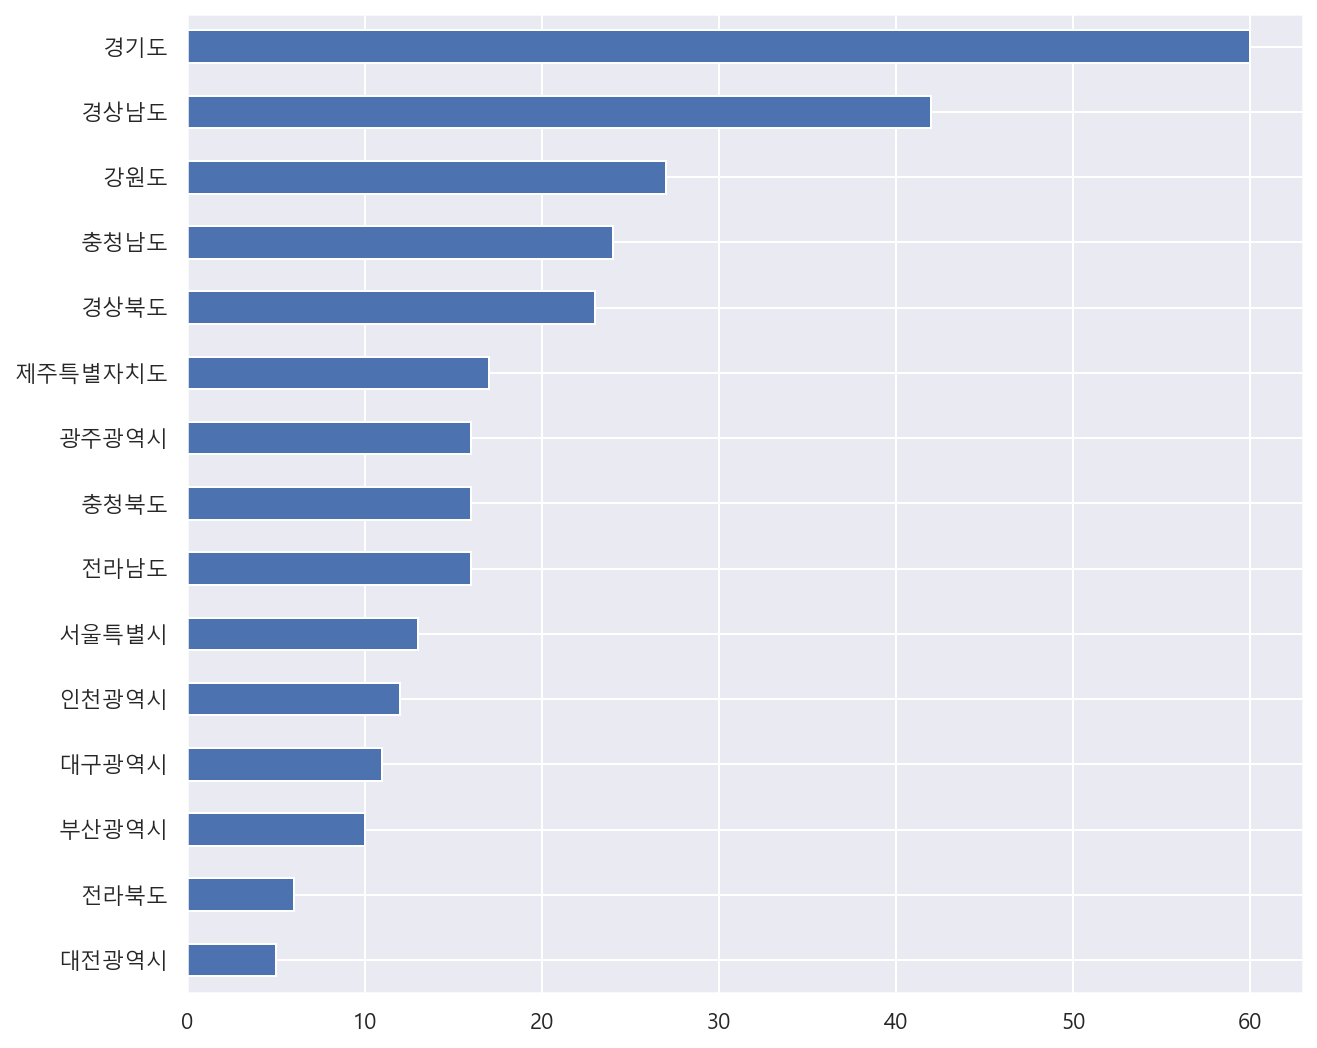

In [44]:
df["시도명"].value_counts(ascending=True).plot.barh(figsize=(10, 9))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='경도', ylabel='위도'>

<Figure size 720x936 with 0 Axes>

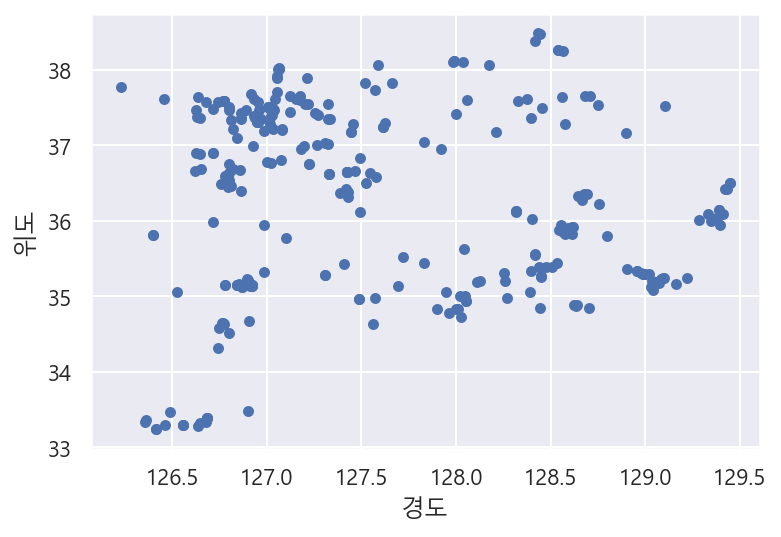

In [45]:
plt.figure(figsize=(10, 13))
df[["위도", "경도"]].plot.scatter(x="경도", y="위도")

<AxesSubplot:xlabel='시도명', ylabel='count'>

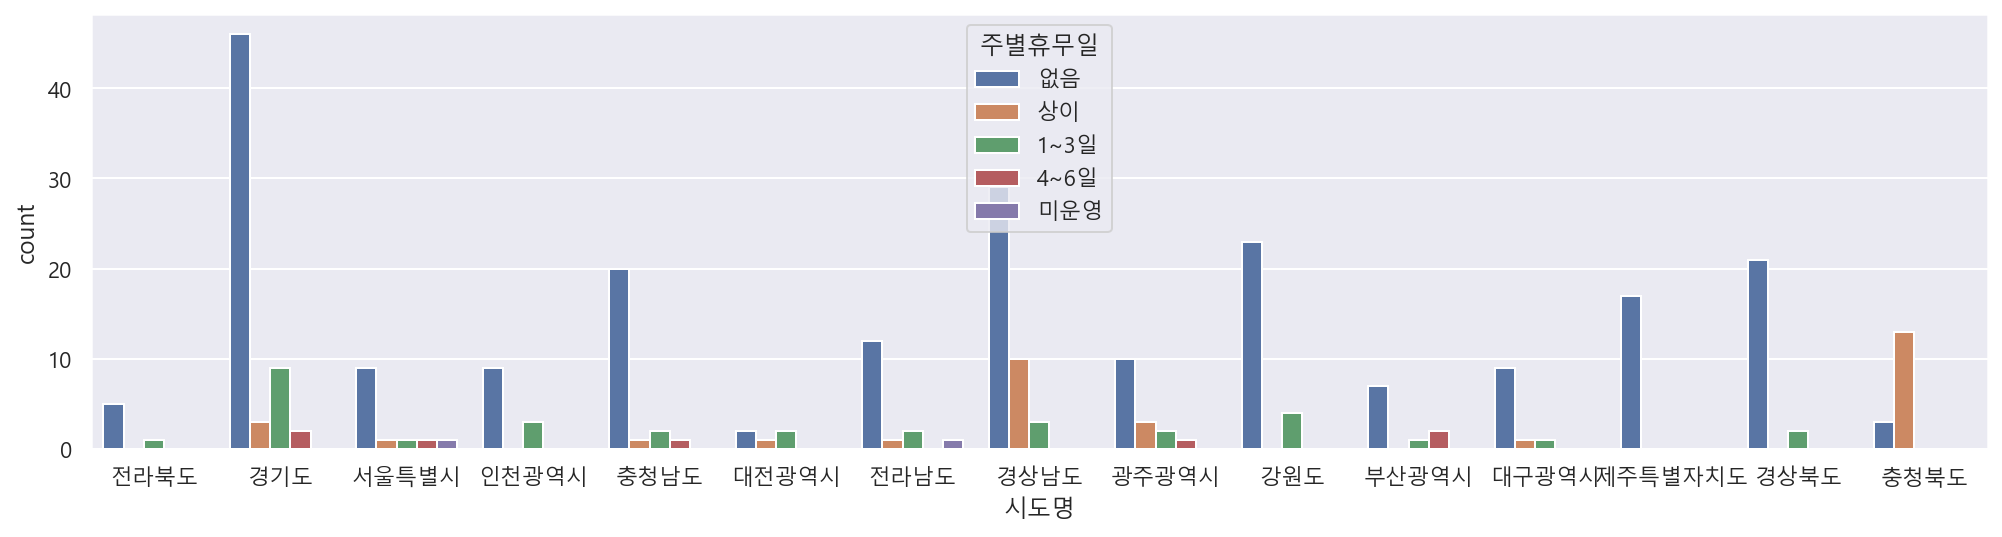

In [46]:
plt.figure(figsize=(17, 4))
sns.countplot(data=df, x="시도명", hue="주별휴무일")

<AxesSubplot:xlabel='시도명', ylabel='count'>

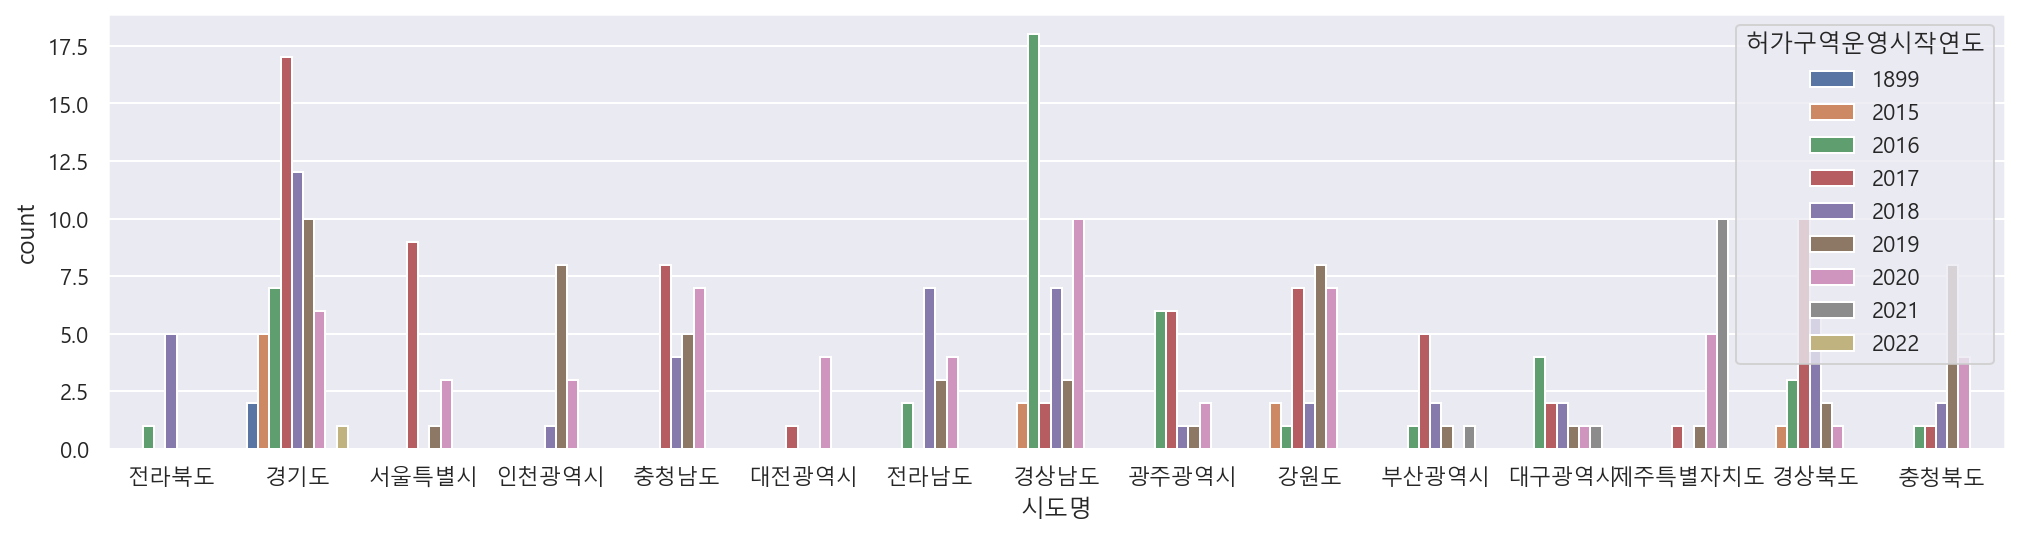

In [47]:
plt.figure(figsize=(17, 4))
sns.countplot(data=df, x="시도명", hue="허가구역운영시작연도")

<AxesSubplot:xlabel='시도명', ylabel='count'>

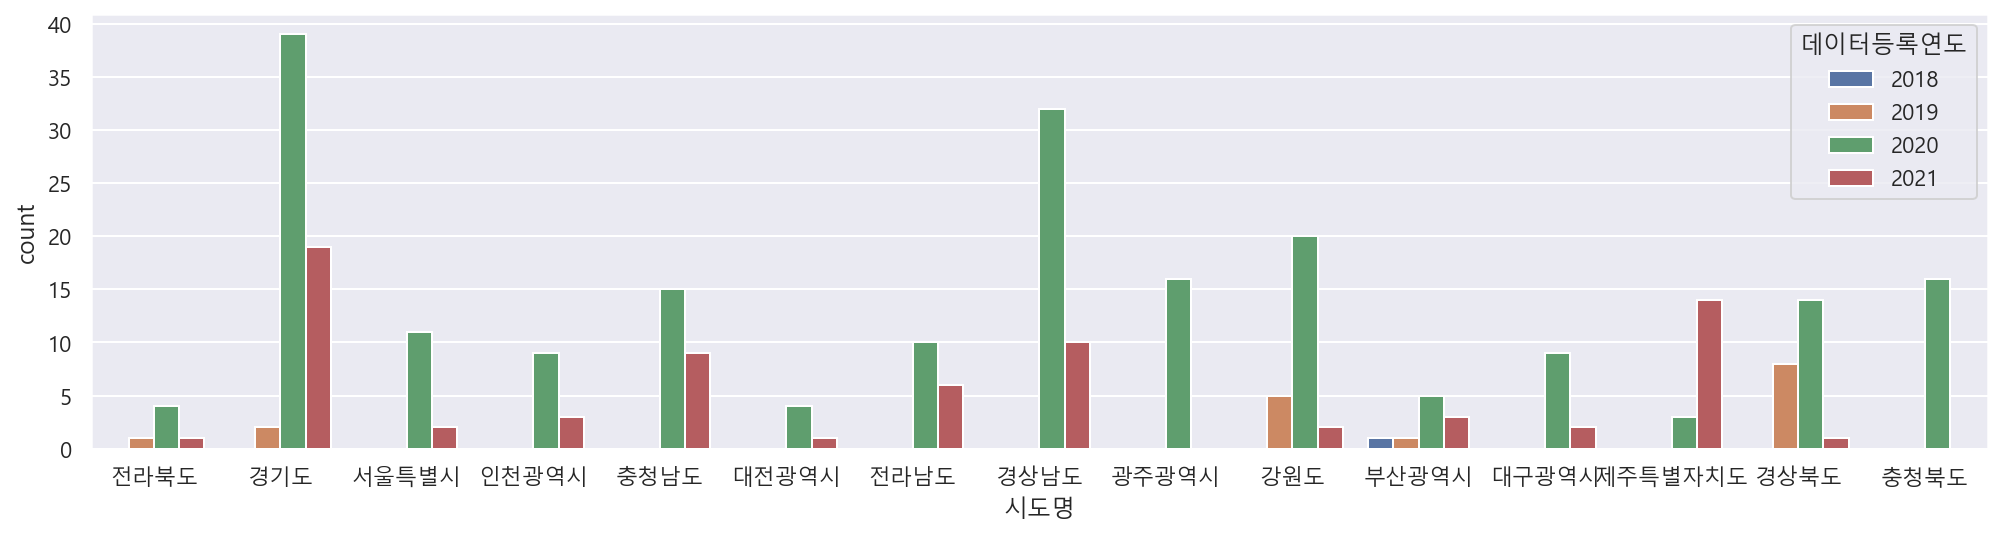

In [48]:
plt.figure(figsize=(17, 4))
sns.countplot(data=df, x="시도명", hue="데이터등록연도")

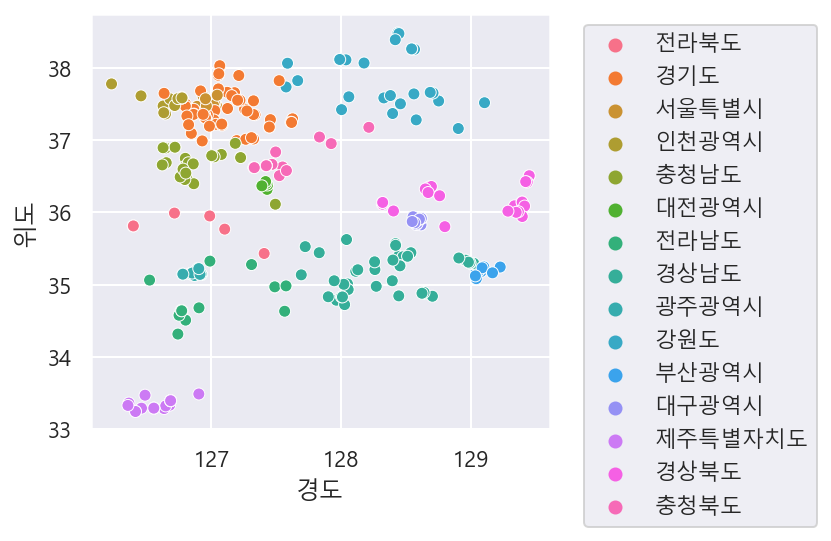

In [49]:
sns.scatterplot(data=df, x="경도", y="위도", hue="시도명")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

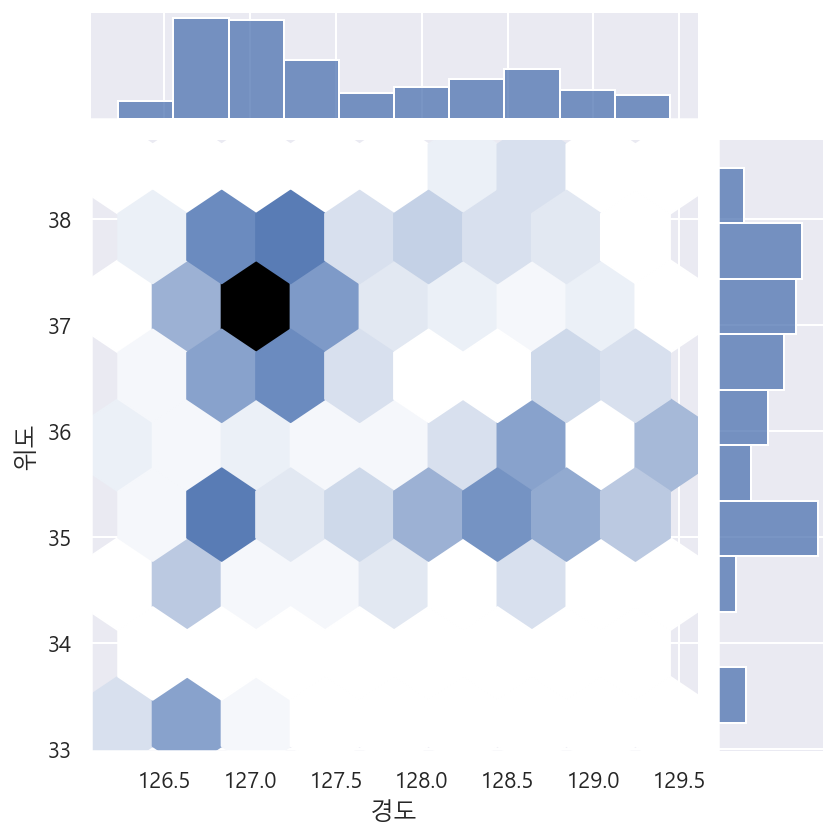

In [50]:
sns.jointplot(data=df, x="경도", y="위도", kind="hex")

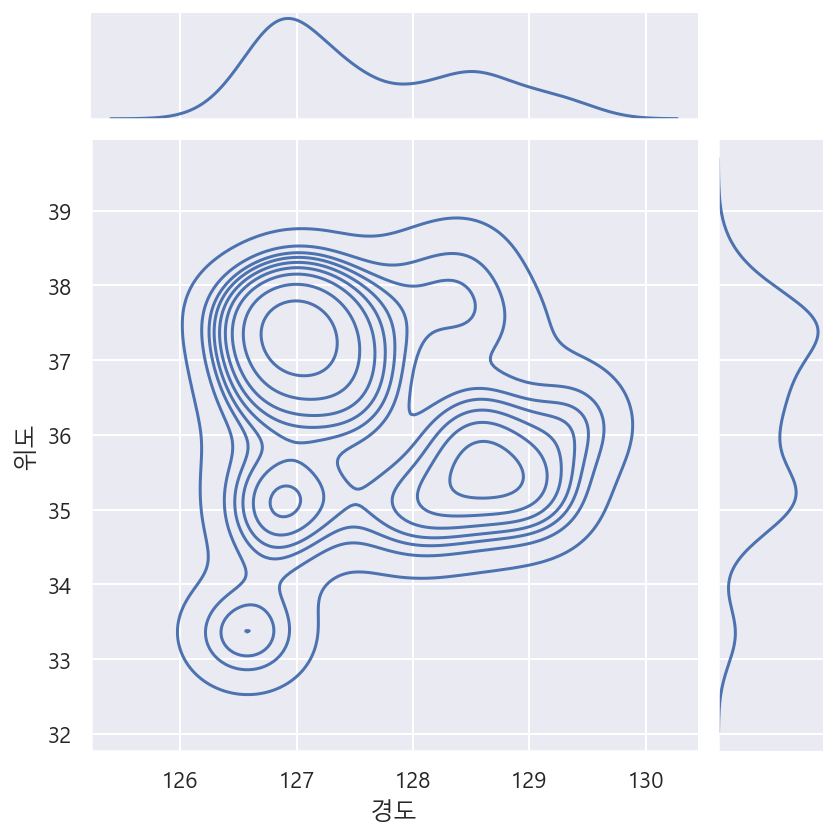

In [51]:
sns.jointplot(data=df, x="경도", y="위도", kind="kde")

## 지도

In [52]:
import folium

In [53]:
lat = df["위도"].mean()
long = df["경도"].mean()
lat, long

(36.282795786095804, 127.59753954140007)

In [54]:
m = folium.Map([lat, long], zoom_start=8)

for i in df.index:
    
    sub_lat = df.loc[i, "위도"]
    sub_long = df.loc[i, "경도"]
    tooltip = df.loc[i, "허가구역명"] +"-"+ df.loc[i, "소재지도로명주소"]
    
    folium.Marker(
        [sub_lat, sub_long], 
        tooltip=tooltip).add_to(m)

m.save('index.html')
m

In [55]:
m = folium.Map([lat, long], zoom_start=8)

for i in df.index:
    
    sub_lat = df.loc[i, "위도"]
    sub_long = df.loc[i, "경도"]
    tooltip = df.loc[i, "허가구역명"] +"-"+ df.loc[i, "소재지도로명주소"]
    
    folium.CircleMarker(
        [sub_lat, sub_long], 
        tooltip=tooltip).add_to(m)

m.save('index.html')
m

In [56]:
m = folium.Map([lat, long], zoom_start=8)

for i in df.index:
    
    sub_lat = df.loc[i, "위도"]
    sub_long = df.loc[i, "경도"]
    tooltip = df.loc[i, "허가구역명"] +"-"+ df.loc[i, "소재지도로명주소"]
    
    color = "blue"
    if df.loc[i, "시도명"] == "경기도":
        color = "red"
        
    folium.CircleMarker(
        [sub_lat, sub_long], color=color,
        tooltip=tooltip).add_to(m)

m.save('index.html')
m

In [57]:
m = folium.Map([lat, long], zoom_start=8, tiles="stamen toner")

for i in df.index:
    
    sub_lat = df.loc[i, "위도"]
    sub_long = df.loc[i, "경도"]
    tooltip = df.loc[i, "허가구역명"] +"-"+ df.loc[i, "소재지도로명주소"]
    
    color = "blue"
    if df.loc[i, "시도명"] == "경기도":
        color = "red"
        
    folium.CircleMarker(
        [sub_lat, sub_long], color=color,
        tooltip=tooltip).add_to(m)

m.save('index.html')
m

In [58]:
heat = df[["위도", "경도"]].copy()

In [59]:
from folium.plugins import HeatMap

m = folium.Map([lat, long], zoom_start=8, tiles="stamen toner")

for i in df.index:
    
    sub_lat = df.loc[i, "위도"]
    sub_long = df.loc[i, "경도"]
    tooltip = df.loc[i, "허가구역명"] +"-"+ df.loc[i, "소재지도로명주소"]
    
    color = "blue"
    if df.loc[i, "시도명"] == "경기도":
        color = "red"
        
    folium.CircleMarker(
        [sub_lat, sub_long], color=color,
        radius=3,
        tooltip=tooltip).add_to(m)

HeatMap(heat).add_to(m)

m.save('index.html')
m

In [60]:
from folium.plugins import MarkerCluster

m = folium.Map([lat, long], zoom_start=8)
marker_cluster = MarkerCluster().add_to(m)

for i in df.index:
    
    sub_lat = df.loc[i, "위도"]
    sub_long = df.loc[i, "경도"]
    tooltip = df.loc[i, "허가구역명"] +"-"+ df.loc[i, "소재지도로명주소"]
    
    folium.CircleMarker(
        [sub_lat, sub_long], 
        tooltip=tooltip).add_to(marker_cluster)

m.save('index.html')
m

# Bokeh 실습

In [61]:
import bokeh
from bokeh.plotting import figure, show, output_file

In [62]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
z = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [63]:
df = pd.DataFrame({
        'x' : x,
        'y' : y,
        'z' : z})

In [64]:
p = figure()

p.scatter(df["x"], df["y"], radius=df["z"]/10, 
         fill_color="black", fill_alpha=0.6, line_color=None)

output_file("scatterplot.html")
show(p)

In [65]:
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y = [i**2 for i in x]

fig = figure(
    tools="pan,box_zoom,wheel_zoom,zoom_in,zoom_out,reset,save",
    title="Example Bokeh plot",
    y_axis_type="log",
    y_range=[0.001, 10**3],
    x_axis_label='Sections',
    y_axis_label='Particles (log)',
    plot_width=600, plot_height=400,
)

fig.circle(x, x, legend_label="y=x", fill_color="white", size=8)
fig.line(x, y, legend_label="y=x^2", line_width=3, line_color="red")

show(fig)